In [6]:
from transformers import SegformerFeatureExtractor, SegformerForSemanticSegmentation
from PIL import Image
import requests
import cv2 as cv

feature_extractor = SegformerFeatureExtractor.from_pretrained("nvidia/segformer-b0-finetuned-cityscapes-512-1024", size = {"height": 467,"width": 833})
# feature_extractor = SegformerFeatureExtractor.from_pretrained("nvidia/segformer-b0-finetuned-cityscapes-512-1024")
model = SegformerForSemanticSegmentation.from_pretrained("nvidia/segformer-b0-finetuned-cityscapes-512-1024")

image = cv.imread("../Data/test_image/TEST_0005.png")

inputs = feature_extractor(images=image, return_tensors="pt")
outputs = model(**inputs)
logits = outputs.logits  # shape (batch_size, num_labels, height/4, width/4)

c:\Users\EHmin\anaconda3\envs\EHmin\lib\site-packages\transformers\models\segformer\feature_extraction_segformer.py:28: FutureWarning: The class SegformerFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use SegformerImageProcessor instead.
  warnings.warn(
c:\Users\EHmin\anaconda3\envs\EHmin\lib\site-packages\transformers\models\segformer\image_processing_segformer.py:101: FutureWarning: The `reduce_labels` parameter is deprecated and will be removed in a future version. Please use `do_reduce_labels` instead.
  warnings.warn(


In [7]:
from torch import nn

upsampled_logits = nn.functional.interpolate(
    logits,
    size=image.shape[:2], # (height, width)
    mode='bilinear',
    align_corners=False
)

# Second, apply argmax on the class dimension
out = upsampled_logits.argmax(dim=1).numpy()

In [10]:
import torch
out = torch.softmax(logits, dim=1).cpu()
out = torch.argmax(out, dim=1).numpy()

In [11]:
out[0]

array([[ 2,  2,  3, ...,  2,  2,  2],
       [ 2,  2,  2, ...,  2,  2,  2],
       [ 2,  2,  3, ...,  2,  2,  2],
       ...,
       [ 0,  0,  0, ..., 13, 13,  0],
       [ 0,  0,  0, ..., 13, 13,  0],
       [ 0,  0,  0, ...,  0, 13,  0]], dtype=int64)

In [12]:
city_to_12 = {
    0: 0,
    1: 1,
    2: 2,
    3: 3,
    4: 3,
    5: 4,
    6: 5,
    7: 6,
    8: 7,
    9: 7,
    10: 8,
    11: 9,
    12 : 10,
    13 : 11,
    14 : 11,
    15 : 11,
    16 : 11,
    17 : 11,
    18 : 11,
}

In [13]:
new = []

for row in out[0]:
  a = []
  for v in row:
    a.append(city_to_12[v])
  new.append(a)

In [14]:
import numpy as np
unique_values, counts = np.unique(new, return_counts=True)

# 결과 출력
for value, count in zip(unique_values, counts):
    print(f"{value}: {count}번")

0: 12921번
1: 17번
2: 3443번
3: 1446번
4: 119번
6: 12번
7: 2671번
8: 3741번
9: 5번
11: 78번


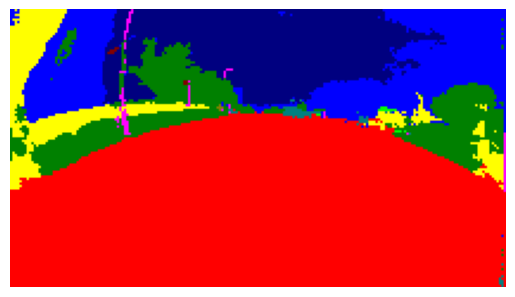

In [15]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Define a custom colormap mapping values 0-11 to specific colors
custom_colormap = [
    (255, 0, 0),   # Red for 0
    (0, 255, 0),   # Green for 1
    (0, 0, 255),   # Blue for 2
    (255, 255, 0), # Yellow for 3
    (255, 0, 255), # Magenta for 4
    (0, 255, 255), # Cyan for 5
    (128, 0, 0),   # Maroon for 6
    (0, 128, 0),   # Green for 7
    (0, 0, 128),   # Navy for 8
    (128, 128, 0), # Olive for 9
    (128, 0, 128), # Purple for 10
    (0, 128, 128)  # Teal for 11
]

# Convert the image to a NumPy array
image_array = np.array(new)
iamge_array = image_array.astype(np.uint8)

# Create an array for the colored image
colored_image = np.zeros((image_array.shape[0], image_array.shape[1], 3), dtype=np.uint8)

# Map the grayscale values to colors using the custom colormap
for i in range(12):
    colored_image[image_array == i] = custom_colormap[i]

# Create a Pillow image from the NumPy array
colored_image_pil = Image.fromarray(colored_image)
# colored_image_pil = colored_image_pil.resize((833, 467), Image.NEAREST)

# Display the image using matplotlib
plt.imshow(colored_image_pil)
plt.axis('off')  # Turn off axis labels and ticks
plt.show()